# Q. 1.
What is a neural network? What are the general steps required to build a neural network?  

Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. It is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature. 

We can build a neural network by following these general steps
  -  Identify set of input features and target attributes.
  -  Define the number of hidden neurons and number of hidden layers.
  -  Method to generate weights either using random number, uniform numbers or range based.
  -  Training of neural networks : forward feed or back propagation
  -  Error metric for the output in each iteration : comparison of output with that of actual for training neural network
  -  Activation function 

# Q. 2.
Generally, how do you check the performance of a neural network? Why?

Good metrics of the performance of a statistical or computational model are essential for model comparison and selection. When checking the performance of neural networks, loss is often used in the training process to find the "best" parameter values for the model. It is what we optimize in the training by updating weights. Once we find the optimized parameters, we use these metrics to evaluate how accurate our model's prediction is compared to the true data. 

# Q. 3.
Create a neural network using keras to predict the outcome of either of these datasets

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import ols, logit
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, IsolationForest
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from statsmodels.graphics.mosaicplot import mosaic

In [83]:
#create and examine dataframe, add headings to make sure the data is easy to understand from attribute information column
abalone_df = pd.read_csv("../dataset/abalone.data",  header=None, names=['Sex',
                                                            'Length',
                                                            'Diameter',
                                                            'Height',
                                                            'Whole weight',
                                                            'Shucked weight',
                                                            'Viscera weight',
                                                            'Shell weight',
                                                            'Rings',])
print(abalone_df.head())
print(abalone_df.shape)

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
(4177, 9)


In [84]:
# Feature engineering and selection:
abalone_df['Age in years'] = abalone_df['Rings']+1.5

# Factorizing Sex column:
column = ['Sex']
for i in column:
    abalone_df["Coded "+i] = pd.factorize(abalone_df[i])[0]+1
    code_key = pd.DataFrame(abalone_df[i])
    code_key["Code for "+i]=abalone_df["Coded "+i]
    abalone_df = abalone_df.drop(i,axis=1)
    print(code_key[[i,"Code for "+i]].value_counts())



Sex  Code for Sex
M    1               1528
I    3               1342
F    2               1307
dtype: int64


In [85]:
#dropping columns
abalone_df= abalone_df.drop(labels=['Whole weight', 'Viscera weight', 'Shucked weight'], axis=1)

In [86]:
X = abalone_df.drop('Age in years',axis=1).values
y = abalone_df['Age in years'].values

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3 ,random_state=24)

# Removing outliers with Isolation Forest:
iso = IsolationForest(contamination=0.1)

In [87]:
n_cols= X.shape[1]
model= Sequential()
model.add(Dense(100, input_shape=(n_cols,), activation= 'relu'))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(1))


In [70]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error', metrics=['accuracy'])

In [71]:
#fit the model
model.fit(X_train, y_train, epochs=500, verbose=False)

#predict
y_pred_keras = model.predict(X_test)

In [72]:
#calculate mse and rmse
mse_keras= mean_squared_error(y_test, y_pred_keras)
print("MSE using Keras", mse_keras)
rmse_keras= np.sqrt(mse_keras)
print("RMSE using Keras", rmse_keras)

MSE using Keras 1.031030402181817e-05
RMSE using Keras 0.0032109662131231107


# Q. 4.
Write another algorithm to predict the same result as the previous question using either KNN or logistic regression

In [73]:
from sklearn.neighbors import KNeighborsRegressor


In [74]:
# creating an object for KNeighborsRegressor using k= n^1/2
knn_reg = KNeighborsRegressor(n_neighbors= 25)

# fitting knn model
knn_reg.fit(X_train,y_train)

# predicting output using test data
y_pred_knn = knn_reg.predict(X_test)

# calculating mse
MSE_knn = mean_squared_error(y_test,y_pred_knn)
print("MSE using KNN Regressor",MSE_knn)
RMSE_knn = np.sqrt(MSE_knn)
print("RMSE using KNN Regressor",RMSE_knn)

MSE using KNN Regressor 0.006241786283891547
RMSE using KNN Regressor 0.07900497632359335


# Q. 5.
Create a neural network using pytorch to predict the same result as question 3

In [101]:
import torch
import torch.nn as nn
import torch.nn.functional as F #where the activation functions are


#create tensors
X_tensor_train = torch.FloatTensor(X_train) 
X_tensor_test = torch.FloatTensor(X_test)

y_tensor_train = torch.LongTensor(y_train)
y_tensor_test = torch.LongTensor(y_test)

print(X_tensor_train)

tensor([[ 0.3100,  0.2350,  0.0600,  0.0400, 11.0000,  1.0000],
        [ 0.5150,  0.4000,  0.1250,  0.1700,  7.0000,  3.0000],
        [ 0.2450,  0.1900,  0.0600,  0.0250,  4.0000,  3.0000],
        ...,
        [ 0.2100,  0.1500,  0.0550,  0.0130,  4.0000,  3.0000],
        [ 0.5050,  0.3750,  0.1800,  0.1700, 12.0000,  2.0000],
        [ 0.2950,  0.2300,  0.0800,  0.0385,  5.0000,  3.0000]])


In [102]:
# creating artificial neural network model
class ANN_Model(nn.Module):
    def __init__(self, input_features = 9, hidden1 = 20, hidden2 = 20, output_features = 1):
        super().__init__()
        self.layer_1_connection = nn.Linear(input_features, hidden1) # adding first hidden layer
        self.layer_2_connection = nn.Linear(hidden1,hidden2) # adding second hidden layer
        self.output_layer = nn.Linear(hidden2, output_features) # adding output layer
    def forward(self,x):
        # applying activation functions to hidden layers
        x = x.view(x.size(0), -1)
        x = F.relu(self.layer_1_connection(x)) # F is torch.nn.functional
        x = F.relu(self.layer_2_connection(x))
        x = self.output_layer(x)
        return x

In [105]:
torch.manual_seed(24)

#create instance of model
ann = ANN_Model()

#loss function
loss_function = nn.MSELoss()

#optimizer
optimizer = torch.optim.Adam(ann.parameters(),lr=0.01)

In [106]:
y_pred = ann.forward(X_tensor_train)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2923x6 and 9x20)

In [ ]:
#run model through multiple epochs/iterations
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)
    
    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss}')
        
    optimizer.zero_grad() #zero the gradient before running backwards propagation
    loss.backward() 
    optimizer.step() #perform one optimization step each epoch

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2923x6 and 9x20)

# Q. 6.
Compare the performance of the neural networks to the other model you created. Which performed better? Why do you think that is? 

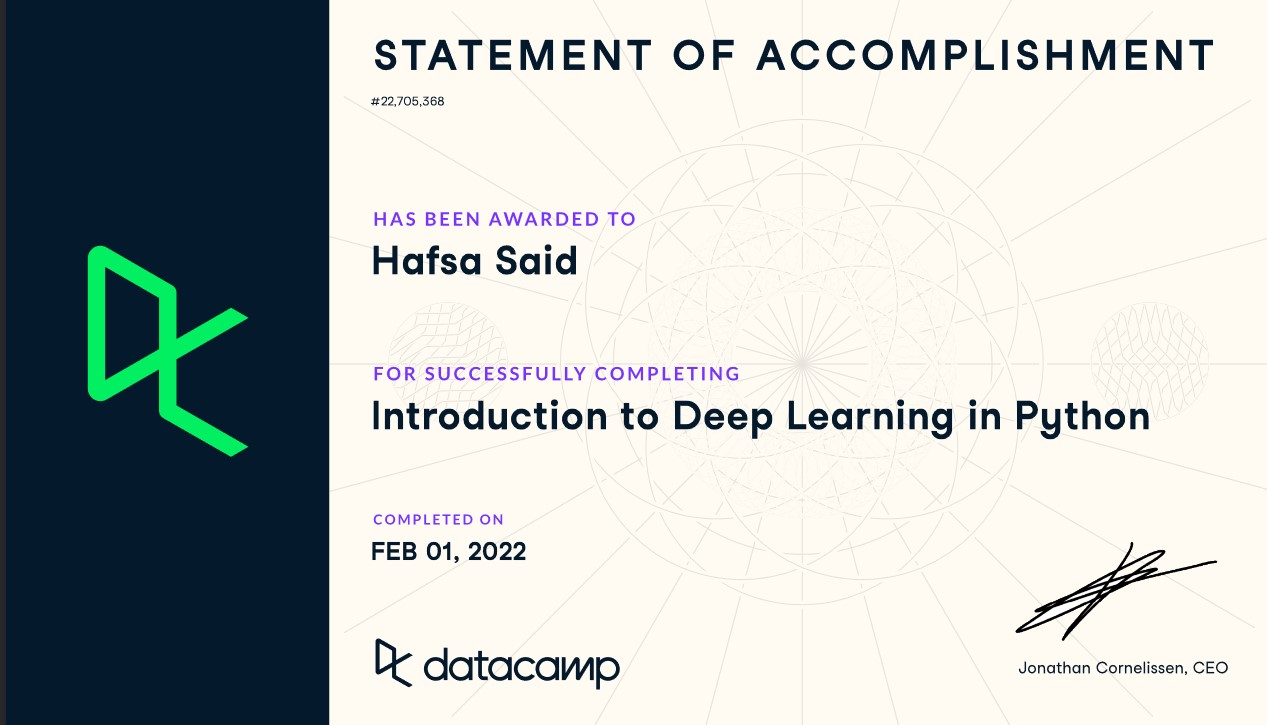